# 1. Introduction et Contextualisation

### Présentation du problème et de l'importance de la sélection non biaisée des candidats.

Au cœur du succès d'une entreprise se trouve son processus de recrutement, un défi complexe où il est crucial d'assurer une sélection de candidats exempte de biais. Notre projet vise à développer un système de sélection non biaisé, crucial pour construire des milieux de travail inclusifs et performants.

Les préjugés dans le recrutement, souvent inconscients, peuvent limiter la diversité et perpétuer des inégalités, fermant la porte à des talents prometteurs. Un recrutement biaisé réduit la diversité de pensée, essentielle à l'innovation et à la créativité.

Notre objectif est donc de créer une solution qui identifie et atténue ces biais, ouvrant la voie à un recrutement fondé sur l'équité et l'inclusion. Cette approche vise non seulement à renforcer la justice sociale, mais aussi à doter les entreprises d'outils pour bâtir des équipes dynamiques, capables de relever les défis futurs.

Ce projet représente une étape vers un environnement de travail où l'égalité des chances est une réalité, où la diversité est valorisée et célébrée.

### Objectifs et portée du projet.

Notre projet se dresse à l'intersection de la technologie et de l'humanité, avec un double objectif clair et ambitieux. D'une part, nous aspirons à développer un outil de sélection de candidats innovant, capable d'identifier et de réduire les biais inhérents au processus de recrutement. D'autre part, nous visons à encourager une prise de conscience plus large sur l'importance de l'équité dans le recrutement, jetant ainsi les bases d'une révolution dans les pratiques des ressources humaines.

La portée de notre projet s'étend bien au-delà de la simple conception d'un algorithme. Nous envisageons un système complet qui non seulement évalue les candidats sur des critères objectifs et équitables, mais offre également des insights précieux sur la manière de structurer des processus de recrutement plus inclusifs. En intégrant des analyses approfondies et des visualisations intuitives, notre solution vise à mettre en lumière les zones d'ombre souvent ignorées dans les pratiques de recrutement actuelles.

Nous sommes conscients des défis et des responsabilités que comporte un tel projet. Cela implique non seulement une compréhension technique approfondie, mais aussi une sensibilité aux nuances sociales et éthiques du recrutement. Notre objectif est de créer un outil qui respecte et valorise la diversité, tout en fournissant aux entreprises les moyens de recruter des talents de manière juste et efficace.

### Aspect technique

##### Packages

In [103]:
!pip install dalex
!pip install statsmodels
!pip install wordcloud
!pip install xgboost

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from wordcloud import WordCloud
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
import dalex as dx
import numpy as np
from copy import copy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
import requests
from io import StringIO


# 2. Collecte et Nettoyage des Données

La réussite de notre projet repose sur une base de données robuste et fiable. Cette étape cruciale détermine la qualité et l'efficacité de toute notre analyse ultérieure. Pour cela, nous allons entreprendre un processus minutieux d'identification et d'acquisition de sources de données pertinentes.

### Identification et acquisition de sources de données pertinentes (bases de données existantes, APIs, scraping, etc.).

**Identification des Sources de Données :** Notre quête commence par la recherche de bases de données existantes qui fournissent des informations complètes et fiables sur les candidats, les processus de recrutement et les critères de sélection. L'objectif est de trouver des données qui reflètent la diversité du marché du travail et qui sont représentatives des différents secteurs et niveaux professionnels. 

L'enquête annuelle générée par les utilisateurs de StackOverflow (plus de 70 000 réponses de plus de 180 pays) examine tous les aspects de l'expérience des développeurs, de l'apprentissage du code aux technologies préférées, en passant par le contrôle de version et l'expérience professionnelle.

À partir des résultats de l'enquête, nous avons construit un jeu de données avec les colonnes suivantes :
- **Age** : âge du candidat, >35 ans ou <35 ans *(catégorique)*
- **EdLevel** : niveau d'éducation du candidat (Licence, Master, Doctorat...) *(catégorique)*
- **Gender** : genre du candidat, (Homme, Femme, ou Non-Binaire) *(catégorique)*
- **MainBranch** : si le candidat est un développeur professionnel *(catégorique)*
- **YearsCode** : depuis combien de temps le candidat programme *(entier)*
- **YearsCodePro** : depuis combien de temps le candidat programme dans un contexte professionnel *(entier)*
- **PreviousSalary** : salaire du dernier emploi du candidat *(flottant)*
- **ComputerSkills** : nombre de compétences informatiques connues par le candidat *(entier)*
- **Employed** : variable cible, indiquant si le candidat a été embauché *(catégorique)*


In [105]:
# Premiere base de donnees sur les developpeurs

# Spécifier l'URL du fichier CSV dans votre dépôt GitHub
github_csv_url = "https://raw.githubusercontent.com/Pierre-Clayton/Projet-Python-ENSAE/main/stackoverflow_full.csv"

# Charger le fichier CSV directement dans un DataFrame Pandas
df = pd.read_csv(github_csv_url, index_col="Unnamed: 0")

# Maintenant, on peut utiliser 'df' comme DataFrame pour travailler avec les données du CSV
# Par exemple, on peut afficher les premières lignes du DataFrame :
print(df.head())

   Age Accessibility        EdLevel  Employment Gender MentalHealth  \
0  <35            No         Master           1    Man           No   
1  <35            No  Undergraduate           1    Man           No   
2  <35            No         Master           1    Man           No   
3  <35            No  Undergraduate           1    Man           No   
4  >35            No            PhD           0    Man           No   

  MainBranch  YearsCode  YearsCodePro    Country  PreviousSalary  \
0        Dev          7             4     Sweden         51552.0   
1        Dev         12             5      Spain         46482.0   
2        Dev         15             6    Germany         77290.0   
3        Dev          9             6     Canada         46135.0   
4     NotDev         40            30  Singapore        160932.0   

                                      HaveWorkedWith  ComputerSkills  Employed  
0                          C++;Python;Git;PostgreSQL               4         0  
1 

**PROPOSITION D'EVOLUTION**

**Acquisition de Données :** Nous ne nous limiterons pas aux bases de données traditionnelles. L'utilisation des APIs et le scraping de sites web sont des méthodes que nous envisageons pour enrichir notre base de données. Ces techniques nous permettront de capter une gamme plus large de données, y compris des informations dynamiques et en temps réel sur les tendances du recrutement.

### Nettoyage et prétraitement des données (traitement des valeurs manquantes, normalisation, etc.).

**Nettoyage et Prétraitement :** Une fois les données collectées, le nettoyage est essentiel. Cette étape consiste à éliminer les incohérences, traiter les valeurs manquantes et s'assurer que les données sont structurées de manière à faciliter les analyses ultérieures. L'objectif est de transformer un ensemble de données brutes et hétérogènes en un format cohérent et exploitable.

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73462 entries, 0 to 73461
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             73462 non-null  object 
 1   Accessibility   73462 non-null  object 
 2   EdLevel         73462 non-null  object 
 3   Employment      73462 non-null  int64  
 4   Gender          73462 non-null  object 
 5   MentalHealth    73462 non-null  object 
 6   MainBranch      73462 non-null  object 
 7   YearsCode       73462 non-null  int64  
 8   YearsCodePro    73462 non-null  int64  
 9   Country         73462 non-null  object 
 10  PreviousSalary  73462 non-null  float64
 11  HaveWorkedWith  73399 non-null  object 
 12  ComputerSkills  73462 non-null  int64  
 13  Employed        73462 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 8.4+ MB


In [107]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [108]:
# Gestion des valeurs manquantes
#df.fillna(df.mean(), inplace=True)  # Pour les données numériques
#df.fillna('Inconnu', inplace=True)    # Pour les données catégorielles

# Suppression des colonnes inutiles
#df.drop(['colonne_inutile1', 'colonne_inutile2'], axis=1, inplace=True)

# Traitement des données textuelles (exemple simple)
#df['colonne_texte'] = df['colonne_texte'].str.strip()

# Conversion des types de données
#df['colonne_numerique'] = pd.to_numeric(df['colonne_numerique'], errors='coerce')

# Traitement des valeurs aberrantes (exemple simple)
#df = df[df['colonne_numerique'] < seuil_valeur_aberrante]

# Normalisation (exemple simple)
#df['colonne_numerique'] = (df['colonne_numerique'] - df['colonne_numerique'].mean()) / df['colonne_numerique'].std()

In [109]:
cat=["Age","Accessibility","EdLevel","Gender","MentalHealth","MainBranch"]
num=["YearsCode","YearsCodePro","PreviousSalary","ComputerSkills"]

# 3. Analyse Exploratoire des Données

### Statistiques descriptives pour comprendre les caractéristiques des données.

In [110]:
# Statistiques descriptives pour les colonnes numériques
descriptive_stats_num = df.describe()

# Statistiques descriptives pour les colonnes non numériques
descriptive_stats_obj = df.describe(include='object')

# Affichage des résultats
print("Statistiques descriptives pour les colonnes numériques:")
print(descriptive_stats_num)
print("\nStatistiques descriptives pour les colonnes non numériques:")
print(descriptive_stats_obj)


Statistiques descriptives pour les colonnes numériques:
         Employment     YearsCode  YearsCodePro  PreviousSalary  \
count  73462.000000  73462.000000  73462.000000    73462.000000   
mean       0.883096     14.218902      9.098377    67750.260611   
std        0.321308      9.405172      7.960201    49488.142118   
min        0.000000      0.000000      0.000000        1.000000   
25%        1.000000      7.000000      3.000000    28839.000000   
50%        1.000000     12.000000      7.000000    57588.000000   
75%        1.000000     20.000000     12.000000    95979.000000   
max        1.000000     50.000000     50.000000   224000.000000   

       ComputerSkills      Employed  
count    73462.000000  73462.000000  
mean        13.428221      0.536223  
std          7.057835      0.498690  
min          0.000000      0.000000  
25%          8.000000      0.000000  
50%         13.000000      1.000000  
75%         17.000000      1.000000  
max        107.000000      1.000000 

### Visualisations (histogrammes, diagrammes en boîte, etc.) pour identifier les tendances et les anomalies.

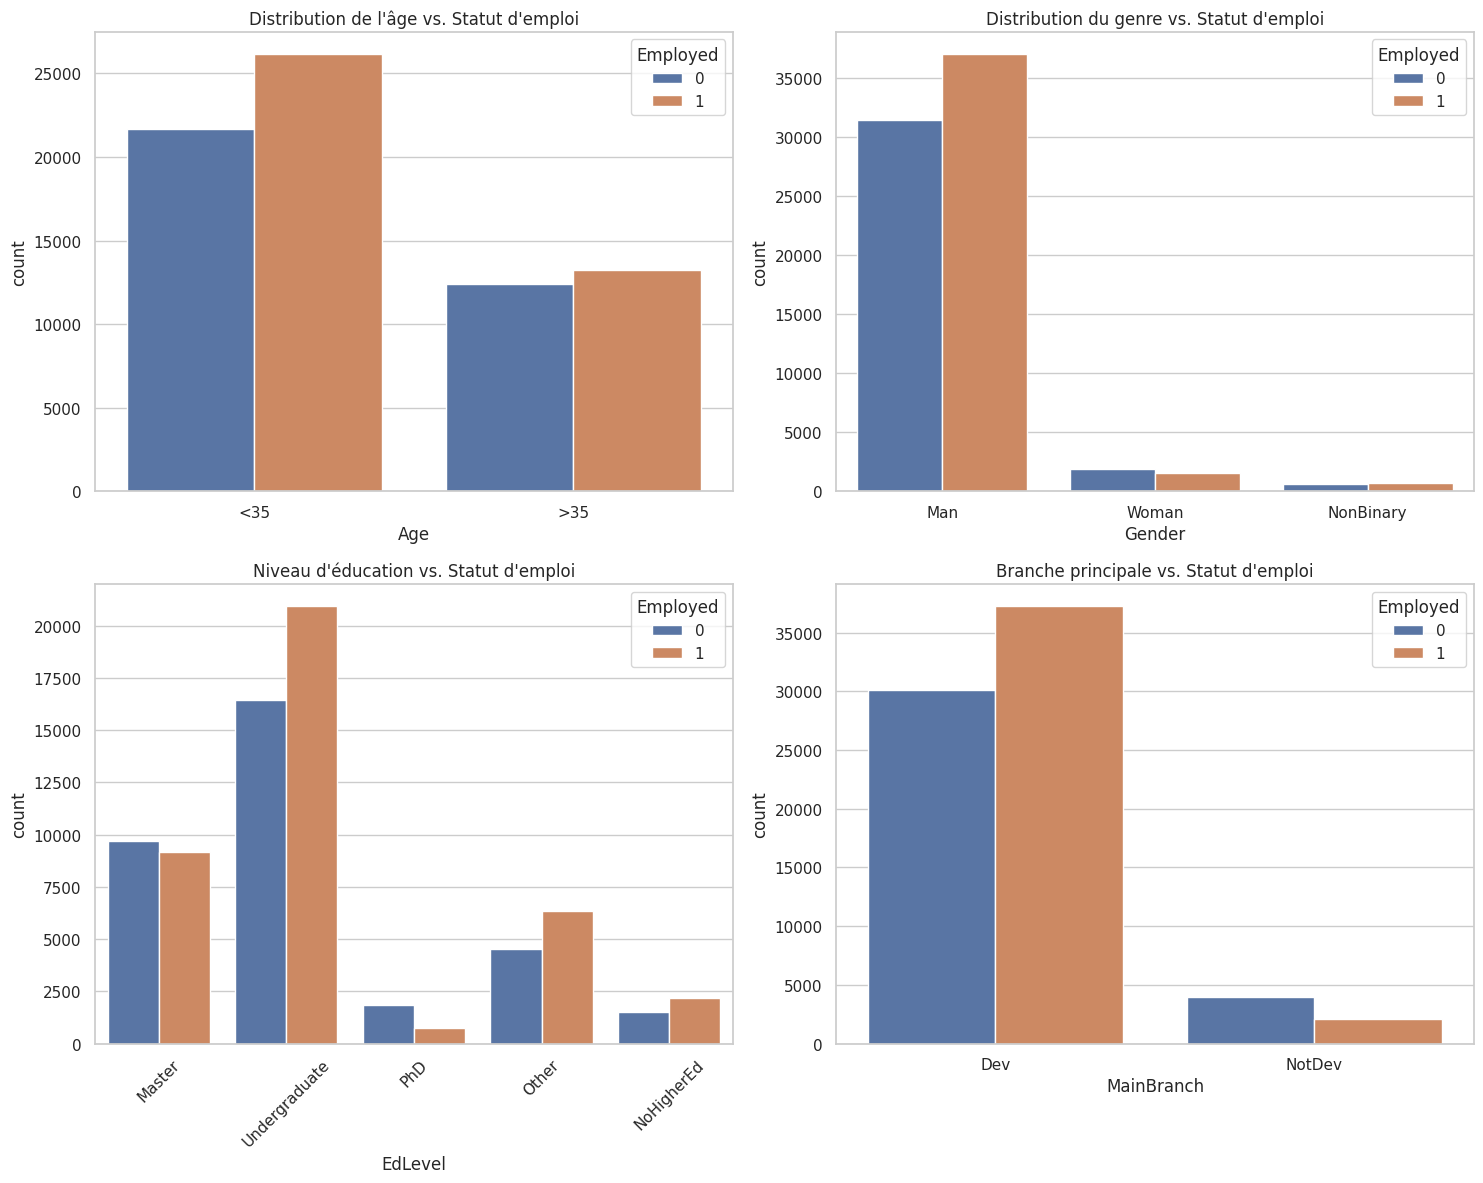

In [111]:
# Configuration des paramètres de visualisation
sns.set(style="whitegrid")

# Tracé des distributions des colonnes démographiques clés et de leur relation avec le statut 'Employed'
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Âge vs. Employé
sns.countplot(x='Age', hue='Employed', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution de l\'âge vs. Statut d\'emploi')

# Genre vs. Employé
sns.countplot(x='Gender', hue='Employed', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution du genre vs. Statut d\'emploi')

# Niveau d'éducation (EdLevel) vs. Employé
sns.countplot(x='EdLevel', hue='Employed', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Niveau d\'éducation vs. Statut d\'emploi')
axes[1, 0].tick_params(axis='x', rotation=45)

# Branche principale (MainBranch) vs. Employé
sns.countplot(x='MainBranch', hue='Employed', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Branche principale vs. Statut d\'emploi')

plt.tight_layout()
plt.show()


(<Figure size 640x480 with 3 Axes>,
 {('0', 'No'): (0.0, 0.0, 0.46146984172004324, 0.7826567736738999),
  ('0', 'Yes'): (0.0,
   0.7859790328101124,
   0.46146984172004324,
   0.21402096718988747),
  ('1', 'No'): (0.46644496609815267,
   0.0,
   0.5335550339018473,
   0.7638530919140368),
  ('1', 'Yes'): (0.46644496609815267,
   0.7671753510502494,
   0.5335550339018473,
   0.2328246489497505)})

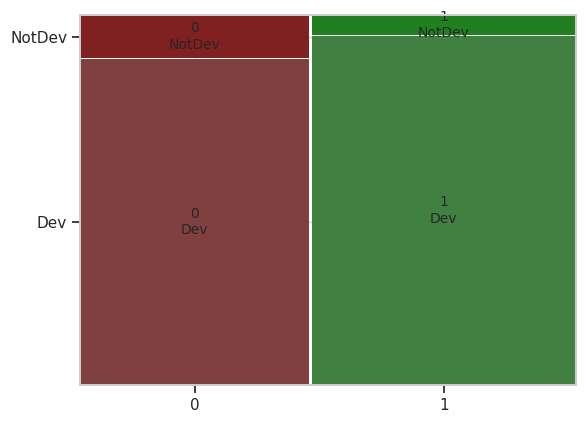

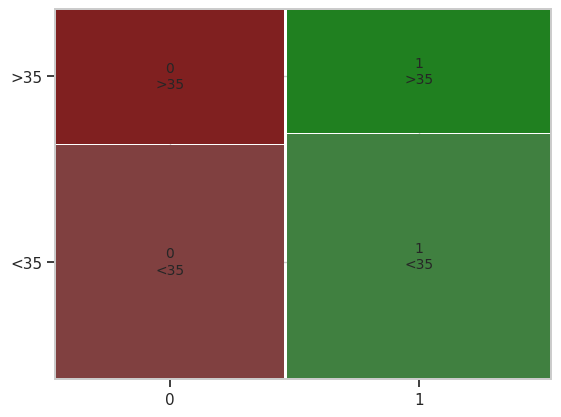

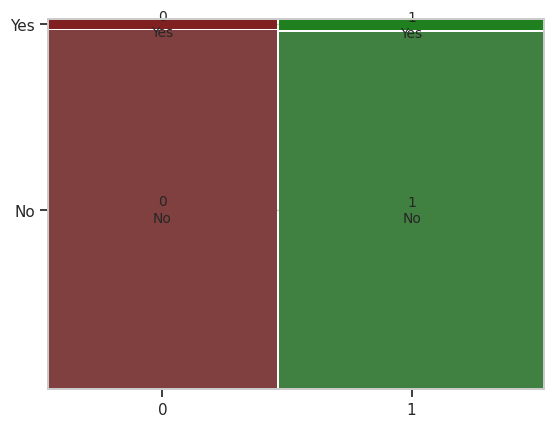

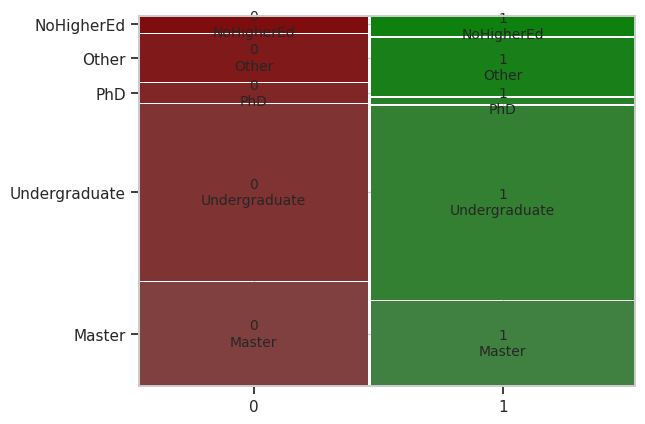

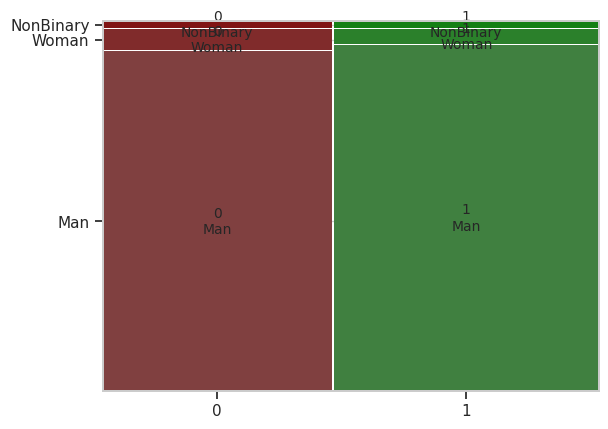

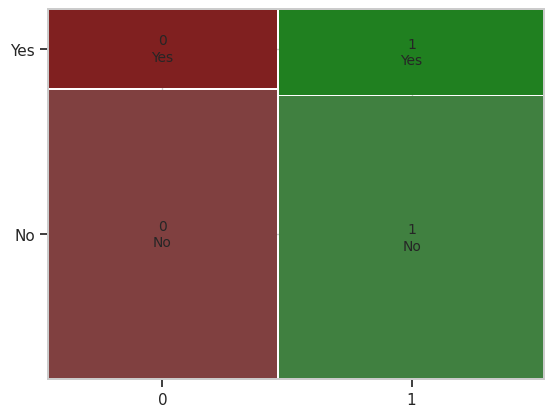

In [112]:
mosaic(df, index=["Employed","MainBranch"])
mosaic(df, index=["Employed","Age"])
mosaic(df, index=["Employed","Accessibility"])
mosaic(df, index=["Employed","EdLevel"])
mosaic(df, index=["Employed","Gender"])
mosaic(df, index=["Employed","MentalHealth"])

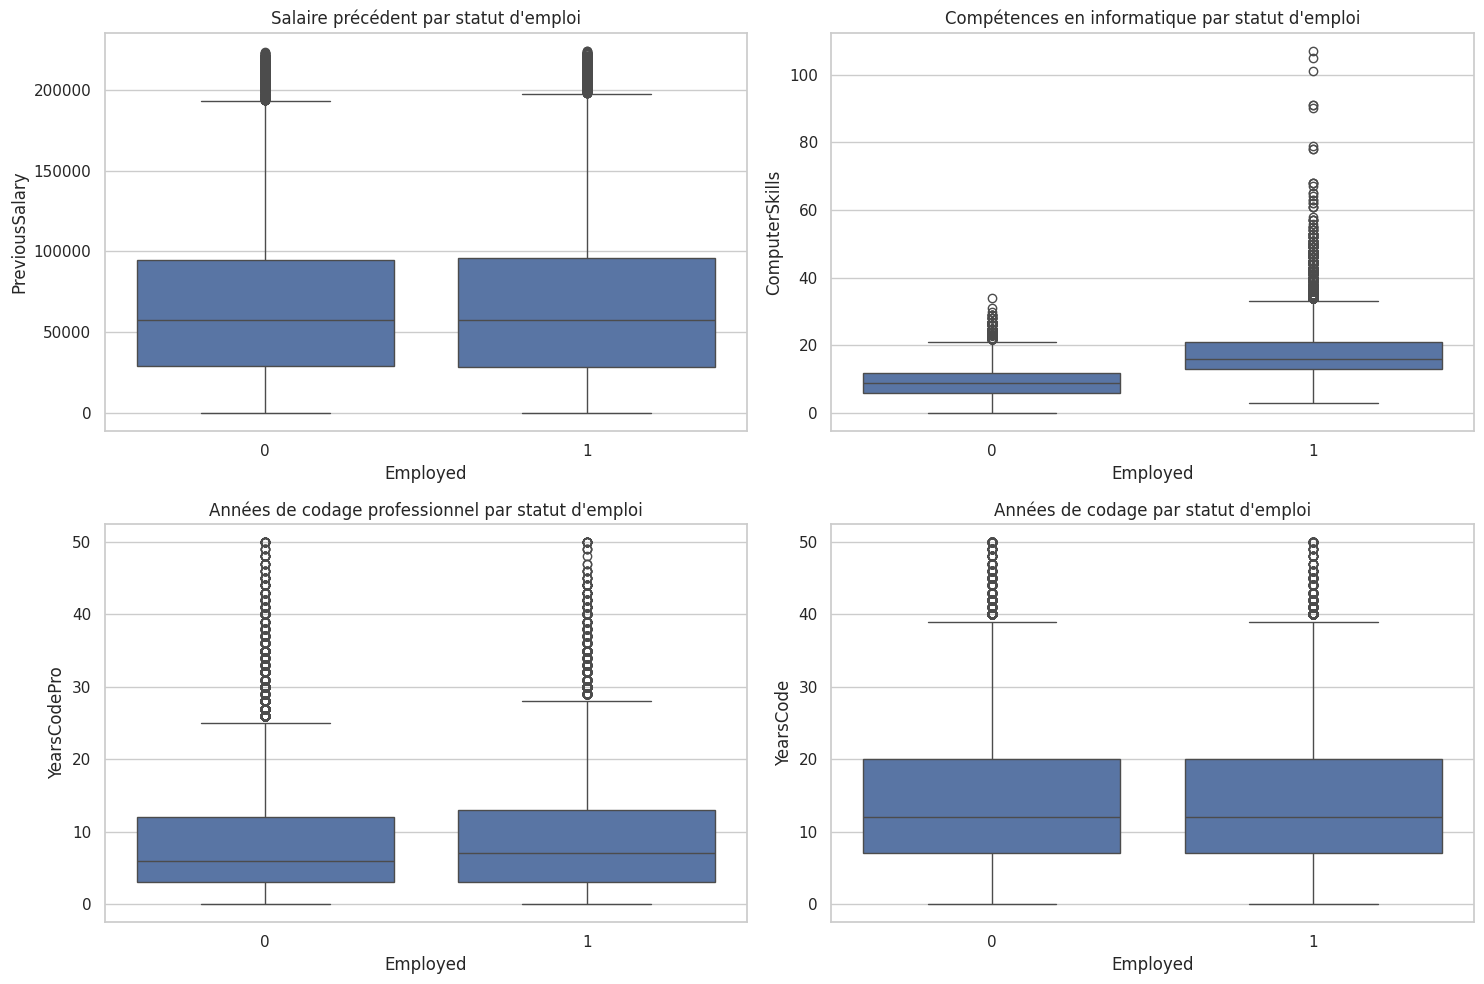

In [113]:
# Configuration du style pour les graphiques
sns.set(style='whitegrid')

# Création d'une figure avec des sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Création de boîtes à moustaches (boxplots) pour chaque variable
sns.boxplot(ax=axes[0, 0], x="Employed", y="PreviousSalary", data=df)
axes[0, 0].set_title('Salaire précédent par statut d\'emploi')

sns.boxplot(ax=axes[0, 1], x="Employed", y="ComputerSkills", data=df)
axes[0, 1].set_title('Compétences en informatique par statut d\'emploi')

sns.boxplot(ax=axes[1, 0], x="Employed", y="YearsCodePro", data=df)
axes[1, 0].set_title('Années de codage professionnel par statut d\'emploi')

sns.boxplot(ax=axes[1, 1], x="Employed", y="YearsCode", data=df)
axes[1, 1].set_title('Années de codage par statut d\'emploi')

# Ajustement de la mise en page
plt.tight_layout()
plt.show()


/tmp/ipykernel_33006/2210567680.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_33006/2210567680.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_33006/2210567680.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




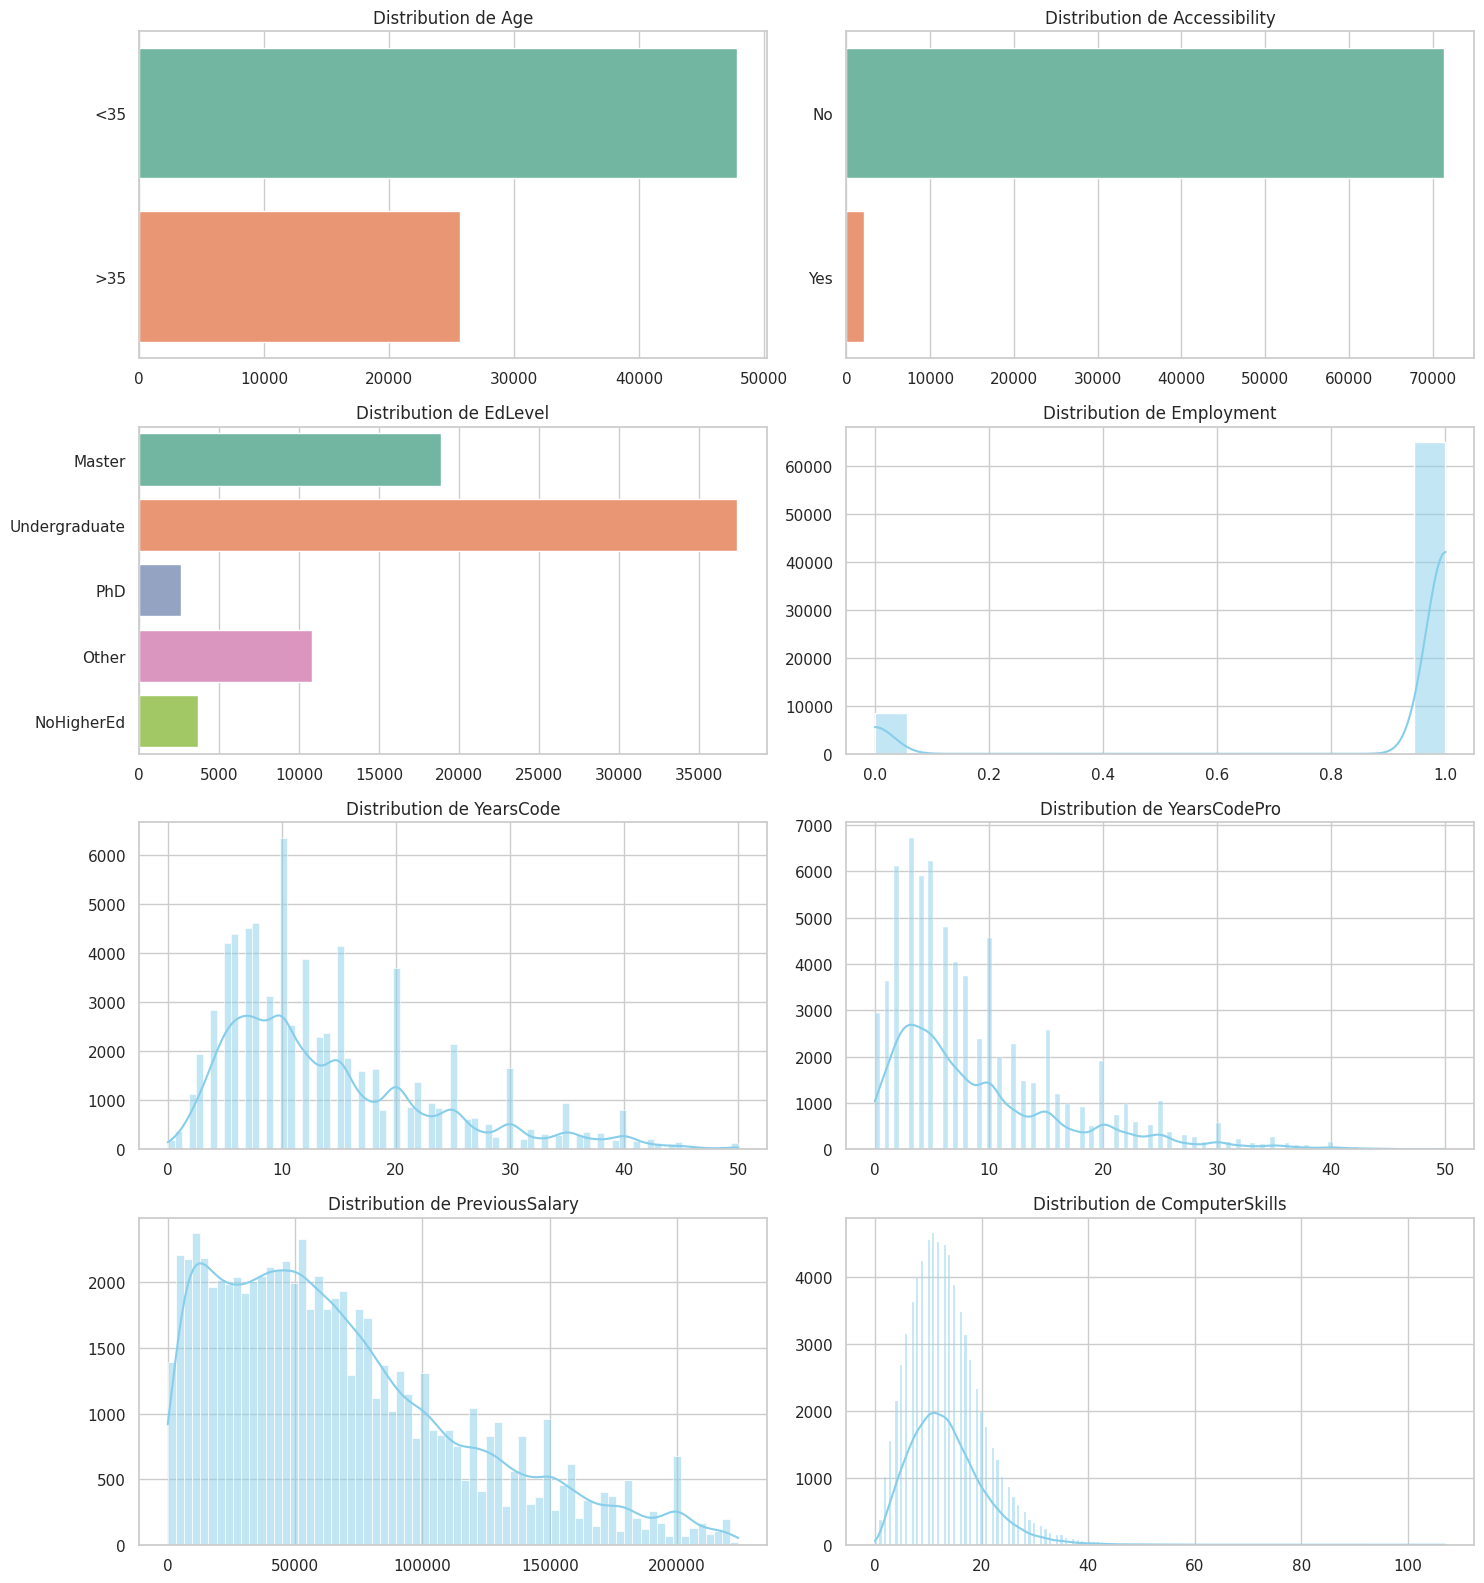

In [114]:
# Sélection d'un sous-ensemble de colonnes pour la visualisation sommaire
# Incluant à la fois des colonnes catégorielles et numériques
colonnes_selectionnées = ['Age', 'Accessibility', 'EdLevel', 'Employment', 'YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']

# Détermination du nombre de lignes et de colonnes pour la grille des sous-graphiques
num_cols = len(colonnes_selectionnées)
nrows = num_cols // 2 if num_cols % 2 == 0 else (num_cols // 2) + 1

# Création de la visualisation combinée
fig, axes = plt.subplots(nrows, 2, figsize=(15, nrows * 4))

for i, col in enumerate(colonnes_selectionnées):
    ax = axes[i // 2, i % 2]
    if df[col].dtype == 'object' or col == 'Employed':
        # Pour les colonnes catégorielles
        sns.countplot(y=col, data=df, ax=ax, palette='Set2')
    else:
        # Pour les colonnes numériques
        sns.histplot(df[col], ax=ax, kde=True, color='skyblue')
    ax.set_title(f'Distribution de {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustement de la mise en page
plt.tight_layout()
plt.show()


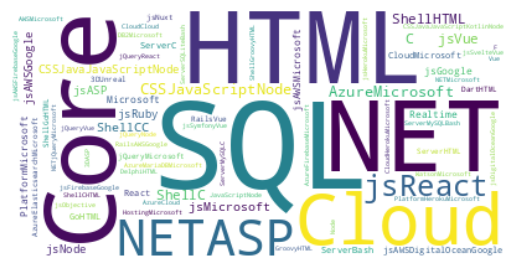

In [115]:
# Travailler avec HaveWorkedWith avant de supprimer la colonne
x = [str(cat).split(";") for cat in df["HaveWorkedWith"]]
texte = [item for sublist in x for item in sublist]
texte_final = "".join(cat for cat in texte)

# Création d'un nuage de mots avec le texte en tant qu'argument dans la méthode .generate()
nuage_de_mots = WordCloud(collocations=False, background_color='white').generate(texte_final)

# Afficher le nuage de mots généré
plt.imshow(nuage_de_mots, interpolation='bilinear')
plt.axis("off")
plt.show()


# 4. Modélisation

## Premiers modèles "baseline"

##### Construction des premiers modèles

In [116]:
preprocess = make_column_transformer(
    (StandardScaler(), num),
    (OneHotEncoder(), cat))
X1=df[['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch','YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']]
y1=df['Employed']

X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, test_size = 0.25, random_state = 4)

In [117]:
# Avec l'échantillon d'origine
# Régression logistique
cv_lr1 = make_pipeline(
    preprocess,
    LogisticRegression(penalty='l2'))
cv_lr1.fit(X1_train, y1_train)

# Arbre de décision
cv_tree1 = make_pipeline(preprocess, DecisionTreeClassifier(max_depth=7, random_state=123))
cv_tree1.fit(X1_train, y1_train)

# Forêt aléatoire
cv_forest1 = make_pipeline(preprocess, RandomForestClassifier(n_estimators=200, max_depth=7, random_state=123))
cv_forest1.fit(X1_train, y1_train)

# XGBoost
cv_xg1 = make_pipeline(preprocess, xgb.XGBClassifier(objective='multi:softmax', num_class=3, max_depth=3, learning_rate=0.1, n_estimators=100))
cv_xg1.fit(X1_train, y1_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Age', 'Accessibility',
                                                   'EdLevel', 'Gender',
                                                   'MentalHealth',
                                                   'MainBranch'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None, num_class=3,
                               num_parallel_tree=None, ...))])

In [118]:
from joblib import dump

# Sauvegarde des modèles
dump(cv_lr1, 'modeles/logistic_regression_baseline.joblib')
dump(cv_tree1, 'modeles/decision_tree_baseline.joblib')
dump(cv_forest1, 'modeles/random_forest_baseline.joblib')
dump(cv_xg1, 'modeles/xgboost_baseline.joblib')

['modeles/xgboost_baseline.joblib']

##### Étude de la performance et de l'équité

Commençons par un petit mot sur la mesure de l'équité de nos modèles. En effet, pour faciliter le développement d'un modèle responsable, nous utilisons le package Python dalex : https://dalex.drwhy.ai/

Citant le tutoriel de Dalex :

> L'idée est que les rapports entre les scores des métriques privilégiées et non privilégiées devraient être proches de 1. Plus ils le sont, plus c'est équitable. Pour assouplir un peu ce critère, cela peut être formulé de manière plus réfléchie :

> $$ \forall i \in \{a, b, ..., z\}, \quad \epsilon < \frac{métrique_i}{métrique_{privilégiée}} < \frac{1}{\epsilon}.$$

> Où epsilon est une valeur comprise entre 0 et 1, elle devrait être une valeur minimale acceptable du rapport. Par défaut, elle est de 0.8, ce qui respecte la règle des quatre cinquièmes (règle des 80%) souvent observée dans l'embauche, par exemple.


Description des métriques utilisées pour l'évaluation de la performance en termes d'équité pour chaque stratégie :

- **Ratio d'opportunité égale** calculé à partir du taux de vrais positifs (rappel)

> Ce nombre décrit les proportions d'instances positives correctement classifiées.

> $TPR = \frac{TP}{P}$

- **Ratio de parité prédictive** calculé à partir de la valeur prédictive positive (précision)

> Ce nombre décrit le ratio d'échantillons qui ont été correctement classifiés comme positifs parmi toutes les prédictions positives.

> $PPV = \frac{TP}{TP + FP}$

- **Ratio d'égalité de précision** calculé à partir de la précision

> Ce nombre est le ratio des instances correctement classifiées (positives et négatives) parmi toutes les décisions.

> $ACC = \frac{TP + TN}{TP + FP + TN + FN}$

- **Ratio d'égalité prédictive** calculé à partir du taux de faux positifs

> Ce nombre décrit la part de négatifs réels qui ont été faussement classifiés comme positifs.

> $FPR = \frac{FP}{TP + TN}$

- **Ratio de parité statistique** calculé à partir du taux de positifs

> Ce nombre est le taux global d'instances classifiées positivement, incluant à la fois les décisions correctes et incorrectes.

> $PR = \frac{TP + FP}{TP + FP + TN + FN}$


In [119]:
# Créer un Explainer pour le Pipeline
exp_tree1 = dx.Explainer(cv_tree1, X1_test, y1_test, verbose=False)
exp_forest1 = dx.Explainer(cv_forest1, X1_test, y1_test, verbose=False)
exp1 = dx.Explainer(cv_lr1, X1_test, y1_test, label='Logistic regression Pipeline')
exp_xg1=dx.Explainer(cv_xg1, X1_test, y1_test, verbose=False)

Preparation of a new explainer is initiated

  -> data              : 18366 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 18366 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Logistic regression Pipeline
  -> predict function  : <function yhat_proba_default at 0x7fcc39b1b760> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.00845, mean = 0.537, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.998, mean = -0.00391, max = 0.951
  -> model_info        : package sklearn

A new explainer has been created!


In [120]:
# Performance du modèle
pd.concat([exp.model_performance().result for exp in [exp1, exp_tree1, exp_forest1,exp_xg1]])

,recall,precision,f1,accuracy,auc
Logistic regression Pipeline,0.797387,0.796168,0.796777,0.783023,0.871296
DecisionTreeClassifier,0.829131,0.775762,0.801559,0.781008,0.866988
RandomForestClassifier,0.822701,0.780932,0.801272,0.782315,0.864049
XGBClassifier,0.827600,0.782172,0.804245,0.785092,0.871589


In [121]:
# Importance des variables
exp_tree1.model_parts().plot(objects=[exp_forest1.model_parts(), exp1.model_parts(),exp_xg1.model_parts()])

In [122]:
# Preparation pour le test d'équité de Gender
protected = X1_test.Gender 
mf_tree1 = exp_tree1.model_fairness(protected=protected,
                                  privileged = "Woman")

mf_forest1 = exp_forest1.model_fairness(protected=protected,
                                  privileged = "Woman")

mf_log1 = exp1.model_fairness(protected=protected,
                                  privileged = "Woman")
mf_xg1=exp_xg1.model_fairness(protected=protected,
                                  privileged = "Woman")

In [123]:
mf_tree1.fairness_check()
mf_forest1.fairness_check()
mf_log1.fairness_check()
mf_xg1.fairness_check()

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV       FPR       STP
Man        1.089005  1.000000  1.031873  1.349515  1.257642
NonBinary  1.109948  1.003841  1.010624  1.383495  1.257642
Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV       FPR       STP
Man        1.089828  0.997449  1.024902  1.381443  1.267857
NonBinary  1.126816  1.014031  1.013106  1.376289  1.272321
Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceed

In [124]:
mf_tree1.plot(objects=[mf_log1, mf_forest1,mf_xg1],
             type="performance_and_fairness",
             fairness_metric="FPR",
             performance_metric="accuracy")

##### Un exemple pour mieux comprendre

In [125]:
john = pd.DataFrame({'Age': '<35',
                       'Accessibility': ['Yes'],
                       'EdLevel': ['PhD'],
                       'Gender': ['Man'],
                       'MentalHealth': ['No'],
                       'MainBranch': ['Dev'],
                       'YearsCode':[14],
                       'YearsCodePro':[7],
                       'PreviousSalary': [60000],
                       'ComputerSkills': [7]
                     },
                      index = ['John'])
mary = pd.DataFrame({'Age': '<35',
                       'Accessibility': ['Yes'],
                       'EdLevel': ['PhD'],
                       'Gender': ['Woman'],
                       'MentalHealth': ['No'],
                       'MainBranch': ['Dev'],
                       'YearsCode':[14],
                       'YearsCodePro':[7],
                       'PreviousSalary': [60000],
                       'ComputerSkills': [7]
                     },
                      index = ['Mary'])
jean = pd.DataFrame({'Age': '<35',
                       'Accessibility': ['Yes'],
                       'EdLevel': ['PhD'],
                       'Gender': ['NonBinary'],
                       'MentalHealth': ['No'],
                       'MainBranch': ['Dev'],
                       'YearsCode':[14],
                       'YearsCodePro':[7],
                       'PreviousSalary': [60000],
                       'ComputerSkills': [7]
                     },
                      index = ['Jean'])

In [126]:
bd_john = exp_xg1.predict_parts(john, type='break_down', label=john.index[0])
bd_mary = exp_xg1.predict_parts(mary, type='break_down', label=mary.index[0])
bd_jean = exp_xg1.predict_parts(jean, type='break_down', label=jean.index[0])
bd_interactions_john = exp_xg1.predict_parts(john, type='break_down_interactions', label="John+")
bd_interactions_mary = exp_xg1.predict_parts(mary, type='break_down_interactions', label="Mary+")
bd_interactions_jean = exp_xg1.predict_parts(jean, type='break_down_interactions', label="Jean+")
sh_john = exp_xg1.predict_parts(john, type='shap', B = 10, label=john.index[0])
sh_mary = exp_xg1.predict_parts(mary, type='shap', B = 10, label=mary.index[0])
sh_jean = exp_xg1.predict_parts(jean, type='shap', B = 10, label=jean.index[0])

/home/codespace/.python/current/lib/python3.10/site-packages/dalex/predict_explanations/_break_down/utils.py:124: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/codespace/.python/current/lib/python3.10/site-packages/dalex/predict_explanations/_break_down/utils.py:124: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/codespace/.python/current/lib/python3.10/site-packages/dalex/predict_explanations/_break_down/utils.py:124: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

In [127]:
sh_john.plot(bar_width = 16)

In [128]:
sh_mary.plot(bar_width = 16)

In [129]:
sh_jean.plot(bar_width = 16)

Nos modèles baseline sont biaisés, nous allons donc essayer de réflechir aux solutions que l'on peut adopter pour mitiger ce biais.

## Reflexion sur les solutions possibles pour corriger les biais détectés

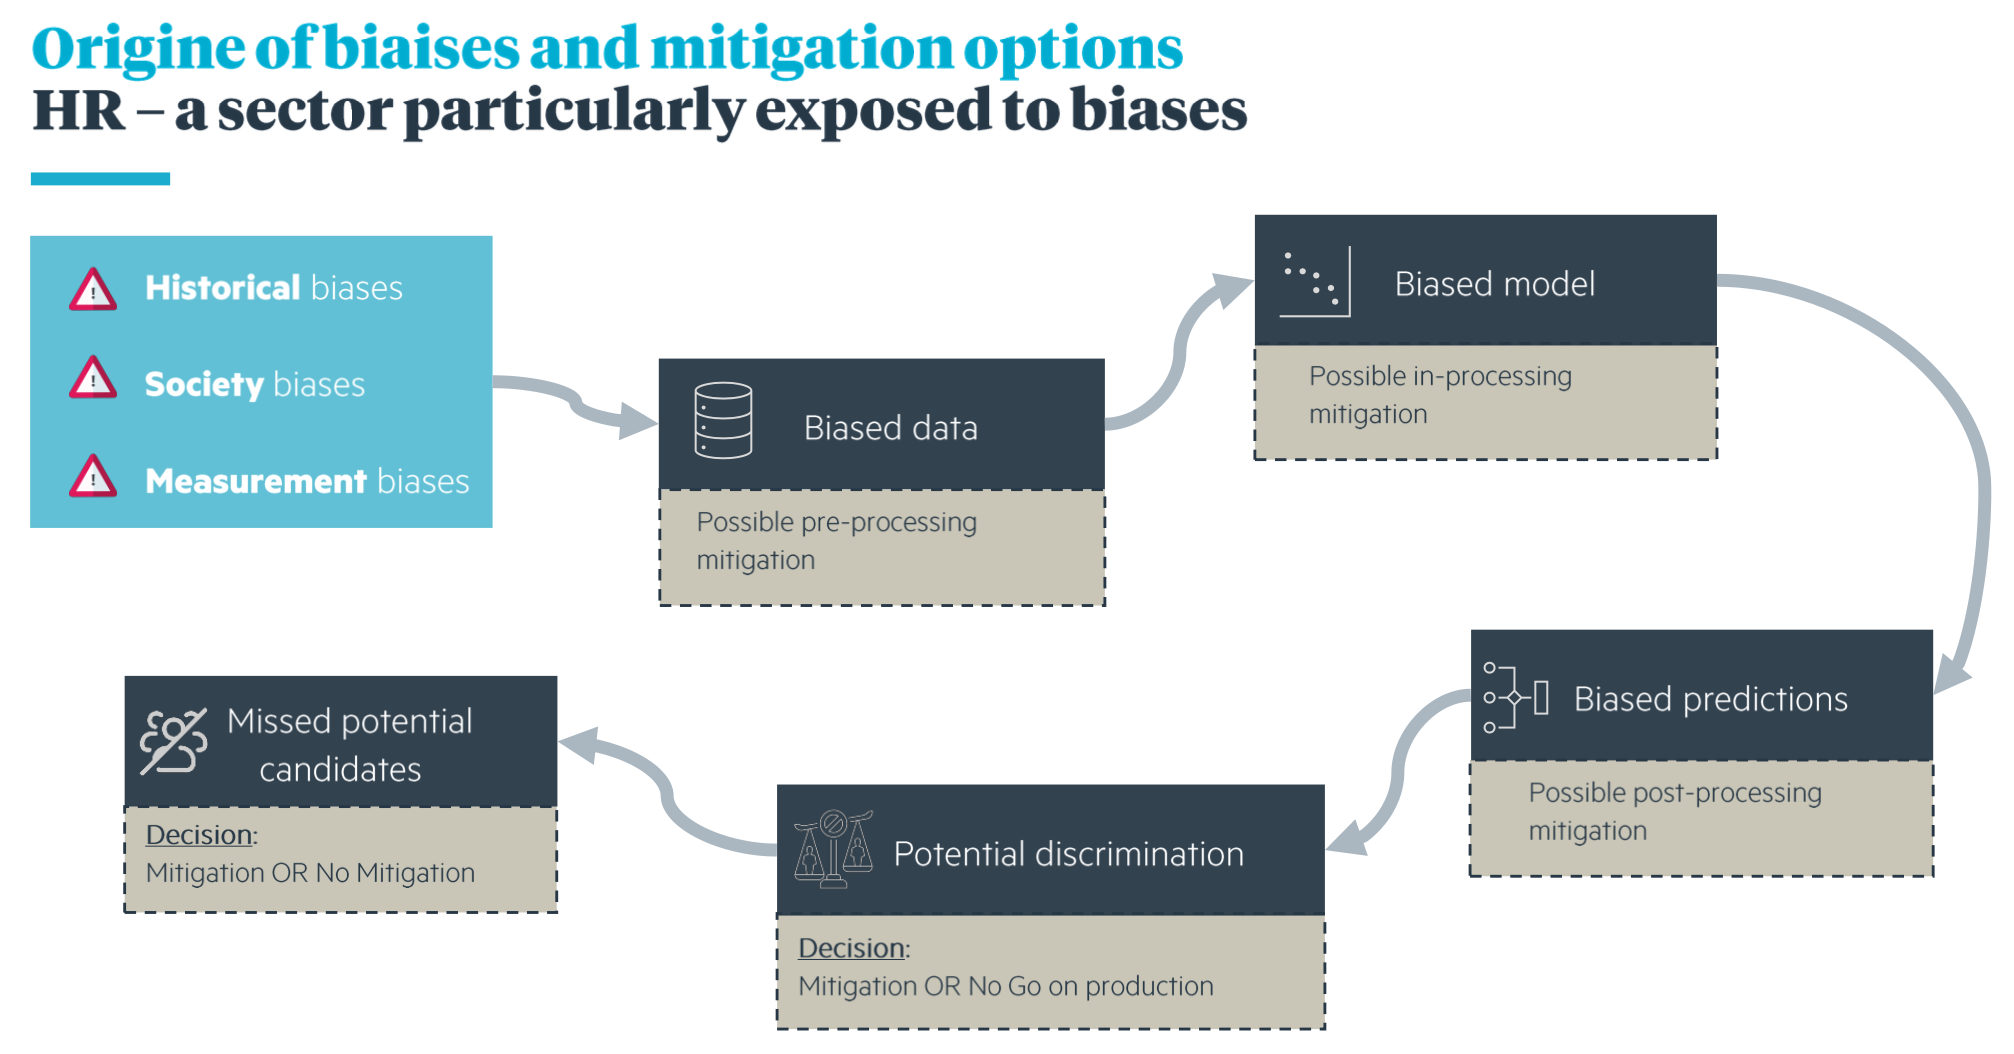

##### Traitement des biais historiques, sociaux et de mesure
- **Biais historiques** : Mettre à jour les ensembles de données avec des informations plus récentes ou utiliser des techniques pour rééquilibrer les données.
- **Biais sociaux** : Mettre en place des programmes de sensibilisation et réviser les processus de recrutement pour les rendre plus objectifs et inclusifs.
- **Biais de mesure** : S'assurer d'avoir un échantillon diversifié et représentatif, et utiliser plusieurs sources de données.


##### Atténuation du prétraitement
- **Nettoyage des données** : Gérer les valeurs manquantes et les erreurs qui peuvent affecter certains groupes.
- **Sélection des caractéristiques** : Choisir des caractéristiques qui n'incluent pas de variables de substitution pour les attributs protégés.
- **Ré-échantillonnage ou ré-pondération** : Équilibrer l'ensemble de données en suréchantillonnant les groupes sous-représentés.


##### Atténuation en cours de traitement
- **Sélection d'algorithmes** : Choisir des algorithmes moins sensibles aux déséquilibres.
- **Incorporer des contraintes d'équité** : Modifier les algorithmes pour inclure l'équité pendant l'entraînement.
- **Validation** : Utiliser la validation croisée pour garantir des performances équitables entre les sous-groupes.


##### Atténuation après le traitement
- **Ajustement des seuils de décision** : Égaliser les faux positifs et les faux négatifs entre les groupes.
- **Étalonnage** : Ajuster les prédictions pour garantir la cohérence.
- **Analyse des résultats** : Analyser les décisions en termes d'équité avant de les finaliser.


##### Points de décision
- **Après le prétraitement** : Déterminer l'efficacité de l'atténuation des biais avant l'entraînement.
- **Après les prédictions** : Décider du déploiement du modèle en fonction de l'analyse de l'équité.


##### Surveillance et rétroaction
- **Surveillance des résultats** : Évaluer les résultats du processus de recrutement à la recherche de signes de biais.
- **Collecte de rétroaction** : Mettre en place des mécanismes de rétroaction auprès des candidats et des employés.


## Mitigation des biais et nouveaux modèles

### Pre-processing Mitigation



In [130]:
# NETTOYAGE DES DONNÉES
# Effectué lors de l'exploration des données

# SÉLECTION DES CARACTÉRISTIQUES
# Suppression des caractéristiques qui pourraient être des proxies pour des attributs protégés (comme 'Country' s'il est un proxy pour l'origine ethnique)
#df = df.drop(['Country'], axis=1)

# RÉ-ÉCHANTILLONNAGE
# Identification de la variable cible
target_column = 'Employed'

# Séparation de l'ensemble de données en classes majoritaires et minoritaires en fonction de la variable cible
majority_class = df[df[target_column] == df[target_column].mode()[0]]  
minority_class = df[df[target_column] != df[target_column].mode()[0]]  

# Sur-échantillonnage de la classe minoritaire
minority_upsampled = resample(minority_class,
                              replace=True,      
                              n_samples=len(majority_class), 
                              random_state=123) 

# Combinaison de la classe majoritaire avec la classe minoritaire sur-échantillonnée
upsampled_data = pd.concat([majority_class, minority_upsampled])

# Mélanger les données pour éviter tout biais d'ordre
upsampled_data = upsampled_data.sample(frac=1, random_state=123).reset_index(drop=True)

# L'ensemble de données 'upsampled_data' est maintenant un ensemble de données équilibré
upsampled_data.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,16,10,India,49564.0,C;Java;Python;Git;AWS;Microsoft Azure;Elastics...,9,0
1,>35,No,Undergraduate,1,Man,No,Dev,28,26,Germany,74651.0,Bash/Shell;C#;Dart;Go;Groovy;HTML/CSS;Java;Jav...,25,1
2,<35,No,Undergraduate,1,Man,No,Dev,15,6,Japan,89929.0,Clojure;Go;Julia;Scala;Kubernetes;Yarn;Flask;G...,12,0
3,<35,No,Undergraduate,1,Man,No,Dev,17,15,Brazil,74784.0,C#;Dart;Go;JavaScript;Kotlin;Python;SQL;TypeSc...,25,1
4,>35,Yes,Other,1,Man,No,Dev,40,33,United States of America,90000.0,C;C#;HTML/CSS;JavaScript;SQL;Git;ASP.NET;jQuer...,9,1


### In-processing Mitigation

##### Data Preprocessing & Preparation for Modeling

- Utilisation de StandardScaler pour normaliser les variables numériques et de OneHotEncoder pour transformer les variables catégorielles en vecteurs binaires.
- Création d'un transformateur de colonnes (make_column_transformer) pour appliquer ces prétraitements aux colonnes appropriées.

- Sélection des caractéristiques d'apprentissage (X) et de la variable cible (y).
- Division des données en ensembles d'entraînement et de test (train_test_split).


In [131]:
X=upsampled_data[['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch','YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']]
y=upsampled_data['Employed']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 4)

##### Creation and Training of Classification Models

- Utilisation de différents algorithmes (régression logistique, arbre de décision, forêt aléatoire, XGBoost) intégrés dans des pipelines pour automatiser le flux de prétraitement et d'apprentissage.


In [132]:
#Avec les données pré-traitées
#Logistic regression
cv_lr = make_pipeline(
    preprocess,
    LogisticRegression(penalty = 'l2'))
cv_lr.fit(X_train, y_train)

#Decision Tree
cv_tree = make_pipeline(preprocess, DecisionTreeClassifier(max_depth=7, random_state=123))
cv_tree.fit(X_train, y_train)

#Random Forest
cv_forest = make_pipeline(preprocess, RandomForestClassifier(n_estimators=200, max_depth=7, random_state=123))
cv_forest.fit(X_train, y_train)

#XGBoost
cv_xg = make_pipeline(preprocess,xgb.XGBClassifier(objective='multi:softmax', num_class=3, max_depth=3, learning_rate=0.1, n_estimators=100))
cv_xg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Age', 'Accessibility',
                                                   'EdLevel', 'Gender',
                                                   'MentalHealth',
                                                   'MainBranch'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None, num_class=3,
                               num_parallel_tree=None, ...))])

In [133]:
# Sauvegarde des modèles
dump(cv_lr, 'modeles/logistic_regression.joblib')
dump(cv_tree, 'modeles/decision_tree.joblib')
dump(cv_forest, 'modeles/random_forest.joblib')
dump(cv_xg, 'modeles/xgboost.joblib')

['modeles/xgboost.joblib']

##### Performance Analysis

- Utilisation de dalex pour créer des "explainers" de modèle qui permettent l'analyse des performances et de l'importance des variables.
- Constat que "ComputerSkills" est la caractéristique la plus importante dans tous les modèles.


In [134]:
# Créer un Explainer pour le Pipeline
exp_tree = dx.Explainer(cv_tree, X_test, y_test, verbose=False)
exp_forest = dx.Explainer(cv_forest, X_test, y_test, verbose=False)
exp = dx.Explainer(cv_lr, X_test, y_test, label='Logistic regression Pipeline')
exp_xg=dx.Explainer(cv_xg, X_test, y_test, verbose=False)

Preparation of a new explainer is initiated

  -> data              : 19696 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 19696 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Logistic regression Pipeline
  -> predict function  : <function yhat_proba_default at 0x7fcc39b1b760> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.00768, mean = 0.498, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.999, mean = 0.00643, max = 0.956
  -> model_info        : package sklearn

A new explainer has been created!


In [135]:
# Performance du modèle
pd.concat([exp.model_performance().result for exp in [exp, exp_tree, exp_forest,exp_xg]])

,recall,precision,f1,accuracy,auc
Logistic regression Pipeline,0.756825,0.794606,0.775255,0.778838,0.869755
DecisionTreeClassifier,0.789866,0.774956,0.782340,0.778483,0.867564
RandomForestClassifier,0.813539,0.761743,0.786789,0.777772,0.867344
XGBClassifier,0.796615,0.771362,0.783785,0.778483,0.870592


In [136]:
# Importance des variables
exp_tree.model_parts().plot(objects=[exp_forest.model_parts(), exp.model_parts(),exp_xg.model_parts()])

##### Analysis of Algorithmic Fairness (Fairness)

- Vérification de l'équité des modèles en se concentrant sur le genre en tant que variable protégée.
- Utilisation de différentes méthodes (vérification de l'équité, visualisation) pour évaluer et représenter graphiquement l'égalité entre les groupes.


In [137]:
# Preparation du Test Fairness
protected = X_test.Gender
mf_tree = exp_tree.model_fairness(protected=protected,
                                  privileged = "Woman")

mf_forest = exp_forest.model_fairness(protected=protected,
                                  privileged = "Woman")

mf_log = exp.model_fairness(protected=protected,
                                  privileged = "Woman")
mf_xg=exp_xg.model_fairness(protected=protected,
                                  privileged = "Woman")

In [138]:
mf_tree.fairness_check()

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV       FPR       STP
Man        1.077551  0.970037  1.033289  1.525641  1.360313
NonBinary  1.080272  0.981273  1.029294  1.423077  1.308094


In [139]:
mf_forest.fairness_check()

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV       FPR       STP
Man        1.057069  0.956843  1.013298  1.625767  1.359102
NonBinary  1.059663  0.965475  1.007979  1.527607  1.311721


In [140]:
mf_log.fairness_check()

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV       FPR       STP
Man        1.115836  0.970075  1.014031  1.685950  1.431085
NonBinary  1.010264  0.946384  1.007653  1.446281  1.246334


In [141]:
mf_xg.fairness_check()

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV       FPR       STP
Man        1.071046  0.960445  1.014455  1.629139  1.375000
NonBinary  1.057641  0.967862  1.014455  1.470199  1.299479


On remarque que tous les classifiers sont biaisés. Essayons de quantifier le biais.

In [142]:
mf_tree.plot(objects=[mf_log, mf_forest, mf_xg])

On observe que le biais ne semble pas très élevé.

In [143]:
mf_tree.plot(objects=[mf_log, mf_forest,mf_xg], type='stacked')

Le DecisionTreeClassifier semble avoir la plus petite parity loss.

In [144]:
mf_tree.plot(objects=[mf_log, mf_forest,mf_xg],
             type="performance_and_fairness",
             fairness_metric="FPR",
             performance_metric="accuracy")

Plus l'exactitude est élevée, plus la perte de parité est grande.
Existe-t-il une méthode qui nous permettrait d'atténuer les biais ? Oui, et nous en essaierons quelques-unes dans la prochaine section.

##### Bias Mitigation

- Application de techniques telles que "ceteris paribus cutoff," "roc_pivot," "resample," "reweight" pour tenter de réduire les biais dans les modèles.
- Reformation des modèles avec ces techniques et évaluation de l'équité après atténuation.

**Ceteris Paribus Cutoff**

La méthode "ceteris paribus cutoff" pour atténuer les biais dans les modèles d'apprentissage automatique consiste à identifier un seuil de décision optimal qui équilibre l'équité et les performances. Cette approche ajuste le seuil de classification tout en maintenant les autres paramètres du modèle constants, dans le but de minimiser les disparités dans les métriques d'équité entre différents groupes. Elle est particulièrement utile dans les scénarios où il existe un compromis entre la précision du modèle et l'équité des prédictions pour les sous-groupes protégés.

In [145]:
mf_tree.plot(objects=[mf_log, mf_forest,mf_xg], type="ceteris_paribus_cutoff", subgroup="Woman")

**ROC Pivot**

Cette méthode ajuste le seuil de décision en fonction de la courbe ROC (Receiver Operating Characteristic) pour équilibrer la sensibilité et la spécificité, dans le but d'améliorer l'équité des prédictions tout en maintenant les performances du modèle.

In [146]:
from dalex.fairness import resample, reweight, roc_pivot

In [147]:
privileged="Woman"
exp1 = copy(exp)
exp2 = copy(exp_forest)
exp3=copy(exp_tree)
expg=copy(exp_xg)
# roc pivot
exp1 = roc_pivot(exp1, protected, privileged, theta = 0.02, verbose = False)
exp2 = roc_pivot(exp2, protected, privileged, theta = 0.02, verbose = False)
exp3 = roc_pivot(exp3, protected, privileged, theta = 0.02, verbose = False)
expg = roc_pivot(expg, protected, privileged, theta = 0.02, verbose = False)


In [148]:
fobject1 = exp1.model_fairness(protected, privileged, label='roc Logistic')
fobject2 = exp2.model_fairness(protected, privileged, label='roc forest')
fobject3 = exp3.model_fairness(protected, privileged, label='roc tree')
fobjectg = expg.model_fairness(protected, privileged, label='roc xg')

In [149]:
fobject1.plot([fobject2,fobject3,fobjectg])

In [150]:
fobjectg.fairness_check()

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV      FPR       STP
Man        1.135664  0.962871  0.988387  1.93985  1.498615
NonBinary  1.110490  0.965347  0.987097  1.75188  1.404432


In [151]:
fobject1.fairness_check()

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR      ACC       PPV       FPR       STP
Man        1.171171  0.97250  0.992405  1.964912  1.539394
NonBinary  1.060060  0.94875  0.986076  1.666667  1.339394


In [152]:
fobject2.fairness_check()

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV       FPR       STP
Man        1.080581  0.956843  1.002635  1.722581  1.405128
NonBinary  1.079260  0.961776  0.993412  1.638710  1.353846


In [153]:
fobject3.fairness_check()

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV       FPR       STP
Man        1.091156  0.971286  1.026631  1.583333  1.383812
NonBinary  1.080272  0.967541  1.007989  1.557692  1.336815


**Resample**

Cette approche consiste à modifier l'ensemble de données d'entraînement en suréchantillonnant les groupes sous-représentés ou en sous-échantillonnant les groupes surreprésentés, créant ainsi un ensemble de données plus équilibré qui peut conduire à des résultats de modèle plus équitables.

In [154]:
# copying
clf_u = copy(cv_lr)
clf_p = copy(cv_lr)
clfx=copy(cv_xg)
clfx2=copy(cv_xg)

In [155]:
indices_uniform = resample(X_test.Gender, y_test, verbose = False)
indices_preferential = resample(X_test.Gender,
                                y_test,
                                type = 'preferential', # different type
                                probs = exp.y_hat, # requires probabilities
                                verbose = False)


clf_u.fit(X_test.iloc[indices_uniform, :], y_test.iloc[indices_uniform])
clf_p.fit(X_test.iloc[indices_preferential, :], y_test.iloc[indices_preferential])
clfx.fit(X_test.iloc[indices_preferential, :], y_test.iloc[indices_preferential])
clfx2.fit(X_test.iloc[indices_uniform, :], y_test.iloc[indices_uniform])


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Age', 'Accessibility',
                                                   'EdLevel', 'Gender',
                                                   'MentalHealth',
                                                   'MainBranch'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None, num_class=3,
                               num_parallel_tree=None, ...))])

In [156]:
exp3u = dx.Explainer(clf_u, X_test, y_test, verbose = False)
exp3p = dx.Explainer(clf_p, X_test, y_test, verbose = False)
exp3x = dx.Explainer(clfx, X_test, y_test, verbose = False)
exp3x1 = dx.Explainer(clfx2, X_test, y_test, verbose = False)

In [157]:
fobject3u = exp3u.model_fairness(protected, privileged, label='res_unif_lr')
fobject3p = exp3p.model_fairness(protected, privileged, label='res_pref_lr')
fobject3xx = exp3x.model_fairness(protected, privileged, label='res_pref_xg')
fobject3x1 = exp3x1.model_fairness(protected, privileged, label='res_unif_xg')

In [158]:
fobject3u.fairness_check()

Bias detected in 1 metric: FPR

Conclusion: your model cannot be called fair because 1 criterion exceeded acceptable limits set by epsilon.
It does not mean that your model is unfair but it cannot be automatically approved based on these metrics.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV       FPR       STP
Man        0.850562  0.998716  1.202112  0.687285  0.921905
NonBinary  0.905618  0.991014  1.126697  0.890034  1.001905


In [159]:
fobject3p.fairness_check()

Bias detected in 1 metric: FPR

Conclusion: your model cannot be called fair because 1 criterion exceeded acceptable limits set by epsilon.
It does not mean that your model is unfair but it cannot be automatically approved based on these metrics.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV       FPR       STP
Man        0.850562  0.998716  1.202112  0.687285  0.921905
NonBinary  0.905618  0.991014  1.126697  0.890034  1.001905


In [160]:
fobject3x1.fairness_check()

No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV       FPR       STP
Man        0.997503  0.973848  1.075862  1.205128  1.210648
NonBinary  1.006242  0.978829  1.057931  1.194872  1.185185


In [161]:
fobject3xx.fairness_check()

No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV       FPR       STP
Man        0.997503  0.973848  1.075862  1.205128  1.210648
NonBinary  1.006242  0.978829  1.057931  1.194872  1.185185


**Reweight**

Cette technique ajuste les poids attribués aux différents échantillons de l'ensemble de données d'entraînement, accordant davantage d'importance aux groupes sous-représentés. Cela contribue à réduire les biais en veillant à ce que le modèle accorde plus d'attention à ces groupes pendant l'entraînement.

Regression logistique

In [162]:
weights = reweight(protected, y_test, verbose = False)

cv_weighted_lr = copy(cv_lr)

kwargs = {cv_weighted_lr.steps[-1][0] + '__sample_weight': weights}

cv_weighted_lr.fit(X_test,y_test, **kwargs)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Age', 'Accessibility',
                                                   'EdLevel', 'Gender',
                                                   'MentalHealth',
                                                   'MainBranch'])])),
                ('logisticregression', LogisticRegression())])

In [163]:
expw_lr = dx.Explainer(cv_weighted_lr, X_test, y_test, verbose = False)
fobjectw_lr = expw_lr.model_fairness(protected, privileged, label='weighted')
fobjectw_lr.fairness_check()

Bias detected in 1 metric: FPR

Conclusion: your model cannot be called fair because 1 criterion exceeded acceptable limits set by epsilon.
It does not mean that your model is unfair but it cannot be automatically approved based on these metrics.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV       FPR       STP
Man        0.987113  0.967742  1.072874  1.183908  1.197561
NonBinary  1.016753  0.961538  1.024291  1.367816  1.236585


In [164]:
fobject3wp = expw_lr.model_fairness(X_test.Age, '<35', label='weighted')
fobject3wp.fairness_check()

No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on '<35'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
          TPR       ACC       PPV       FPR   STP
>35  0.970284  0.993614  0.978697  0.947115  0.93


In [165]:
fobject3wp = expw_lr.model_fairness(X_test.MentalHealth, 'No', label='weighted')
fobject3wp.fairness_check()

No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on 'No'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
          TPR       ACC       PPV  FPR      STP
Yes  1.042161  1.007692  1.015209  1.1  1.09205


In [166]:
fobject3wp = expw_lr.model_fairness(X_test.Accessibility, 'No', label='weighted')
fobject3wp.fairness_check()

No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on 'No'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
         TPR       ACC      PPV      FPR       STP
Yes  1.07451  1.015365  1.02402  1.20197  1.169072


C'est beaucoup mieux qu'auparavant. Nous avons décidé d'essayer avec l'arbre de décision et le XGBoost.

Essayons avec un arbre de décision

In [167]:
clf_weighted_forest = copy(cv_forest)

kwargs = {clf_weighted_forest.steps[-1][0] + '__sample_weight': weights}

clf_weighted_forest.fit(X_test,y_test, **kwargs)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Age', 'Accessibility',
                                                   'EdLevel', 'Gender',
                                                   'MentalHealth',
                                                   'MainBranch'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=7, n_estimators=200,
                                        random_state=123))])

In [168]:
expwt = dx.Explainer(clf_weighted_forest, X_test, y_test, verbose = False)
fobject3wt = expwt.model_fairness(protected, privileged, label='weighted')
fobject3wt.fairness_check()

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV      FPR       STP
Man        1.005083  0.957265  1.035526  1.39375  1.266667
NonBinary  1.044473  0.969475  1.014474  1.45625  1.283951


Essayons avec le xgboost

In [169]:
clf_weighted_xg = copy(cv_xg)

kwargs = {clf_weighted_xg.steps[-1][0] + '__sample_weight': weights}

clf_weighted_xg.fit(X_test,y_test, **kwargs)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Age', 'Accessibility',
                                                   'EdLevel', 'Gender',
                                                   'MentalHealth',
                                                   'MainBranch'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None, num_class=3,
                               num_parallel_tree=None, ...))])

In [170]:
expxg = dx.Explainer(clf_weighted_xg, X_test, y_test, verbose = False)
fobjectxg = expxg.model_fairness(protected, privileged, label='weighted')
fobjectxg.fairness_check()

No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on 'Woman'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                TPR       ACC       PPV       FPR       STP
Man        0.971951  0.975062  1.089385  1.109524  1.160356
NonBinary  0.996341  0.983791  1.069832  1.133333  1.158129


In [171]:
fobjectxg = expxg.model_fairness(X_test.Accessibility, 'No', label='weighted')
fobjectxg.fairness_check()

No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on 'No'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
          TPR       ACC       PPV       FPR       STP
Yes  1.035132  1.019157  1.050258  1.017241  1.094961


In [172]:
fobjectxg = expxg.model_fairness(X_test.MentalHealth, 'No', label='weighted')
fobjectxg.fairness_check()

No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on 'No'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
          TPR       ACC       PPV       FPR       STP
Yes  1.046895  1.015385  1.020672  1.078947  1.088757


In [173]:
fobjectxg = expxg.model_fairness(X_test.Age, '<35', label='weighted')
fobjectxg.fairness_check()

No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on '<35'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
          TPR       ACC       PPV       FPR       STP
>35  0.967782  0.996173  0.985915  0.908333  0.922932


In [174]:
fobjectxg.plot()

Donc, l'atténuation du modèle XGBoost avec la répartition tend à le rendre équitable par rapport aux variables : l'âge, le genre, l'accessibilité et la santé mentale.

##### Detailed Analysis with Dalex

- Utilisation de model_parts, model_performance et d'autres outils de Dalex pour une analyse plus approfondie.
- Évaluation de l'impact des différentes caractéristiques sur les prédictions des modèles à l'aide de techniques telles que SHAP (SHapley Additive exPlanations) et Break Down (BD).

In [175]:
explanation=expxg.model_parts()
explanation.result
explanation.plot()

In [176]:
explanationp=exp_xg1.model_parts()
explanationp.result
explanationp.plot()

In [177]:
mp = expxg.model_performance(model_type = 'classification')
mp.result

,recall,precision,f1,accuracy,auc
XGBClassifier,0.798026,0.777429,0.787593,0.783052,0.874814


In [178]:
mp.plot(geom="roc")

### Post-processing Mitigation/Evaluation

##### Complementary Analysis

- Utilisation de la validation croisée pour évaluer les performances du modèle XGBoost.
- Analyse des profils du modèle (PDP - Partial Dependence Plots, ALE - Accumulated Local Effects) pour comprendre comment différentes caractéristiques influencent les prédictions.

In [179]:
# Effectuer une validation croisée
cv_scores = cross_val_score(cv_xg, X_train, y_train, cv=5, scoring='accuracy')

# Afficher les scores de validation croisée
print("Scores de validation croisée :", cv_scores)
print("Précision moyenne : {:.2f}".format(cv_scores.mean()))

Scores de validation croisée : [0.78033508 0.78321205 0.78727365 0.78454769 0.78844038]
Précision moyenne : 0.78


In [180]:
param_grid = {
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__max_depth': [3, 4, 5],
    'xgbclassifier__n_estimators': [50, 100, 200]
}

# Choisissez une stratégie de validation croisée, par exemple, une validation croisée à 5 plis
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Créez un pipeline avec prétraitement et XGBoost
xgb_model = make_pipeline(preprocess, xgb.XGBClassifier())

# Configurez GridSearchCV avec le pipeline
grid_search = GridSearchCV(xgb_model, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Affichez les meilleurs hyperparamètres
print("Meilleurs Hyperparamètres : ", grid_search.best_params_)

# Évaluez sur l'ensemble de test
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Erreur quadratique moyenne sur l'ensemble de test : ", mse)


Meilleurs Hyperparamètres :  {'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__max_depth': 5, 'xgbclassifier__n_estimators': 200}
Erreur quadratique moyenne sur l'ensemble de test :  0.2167952883834281


In [181]:
ale_num = expxg.model_profile(type = 'accumulated', label="ale")

Calculating ceteris paribus: 100%|██████████| 10/10 [00:00<00:00, 25.04it/s]
/home/codespace/.python/current/lib/python3.10/site-packages/dalex/model_explanations/_aggregated_profiles/utils.py:144: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.   0.5  1.  ... 49.  49.5 50. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating accumulated dependency: 100%|██████████| 4/4 [00:00<00:00,  8.71it/s]


In [182]:
pdp_num = expxg.model_profile(type = 'partial', label="pdp")

Calculating ceteris paribus: 100%|██████████| 10/10 [00:00<00:00, 24.15it/s]
/home/codespace/.python/current/lib/python3.10/site-packages/dalex/model_explanations/_aggregated_profiles/utils.py:144: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.   0.5  1.  ... 49.  49.5 50. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [183]:
pdp_num.plot(ale_num)

##### Interpretation/Visualisation de notre meilleur modèle (XGBoost)

In [184]:
john = pd.DataFrame({'Age': '<35',
                       'Accessibility': ['Yes'],
                       'EdLevel': ['PhD'],
                       'Gender': ['Man'],
                       'MentalHealth': ['No'],
                       'MainBranch': ['Dev'],
                       'YearsCode':[4],
                       'YearsCodePro':[7],
                       'PreviousSalary': [60000],
                       'ComputerSkills': [7]
                     },
                      index = ['John'])
mary = pd.DataFrame({'Age': '<35',
                       'Accessibility': ['Yes'],
                       'EdLevel': ['PhD'],
                       'Gender': ['Woman'],
                       'MentalHealth': ['No'],
                       'MainBranch': ['Dev'],
                       'YearsCode':[4],
                       'YearsCodePro':[7],
                       'PreviousSalary': [60000],
                       'ComputerSkills': [7]
                     },
                      index = ['Mary'])
jean = pd.DataFrame({'Age': '<35',
                       'Accessibility': ['Yes'],
                       'EdLevel': ['PhD'],
                       'Gender': ['NonBinary'],
                       'MentalHealth': ['No'],
                       'MainBranch': ['Dev'],
                       'YearsCode':[4],
                       'YearsCodePro':[7],
                       'PreviousSalary': [60000],
                       'ComputerSkills': [7]
                     },
                      index = ['Jean'])

In [185]:
bd_john = expxg.predict_parts(john, type='break_down', label=john.index[0])
bd_mary1 = expxg.predict_parts(mary, type='break_down', label=mary.index[0])
bd_jean = expxg.predict_parts(jean, type='break_down', label=jean.index[0])
bd_interactions_john = expxg.predict_parts(john, type='break_down_interactions', label="John+")
bd_interactions_mary1 = expxg.predict_parts(mary, type='break_down_interactions', label="Mary+")
bd_interactions_jean = expxg.predict_parts(jean, type='break_down_interactions', label="Jean+")
sh_john1 = expxg.predict_parts(john, type='shap', B = 10, label=john.index[0])
sh_mary1 = expxg.predict_parts(mary, type='shap', B = 10, label=mary.index[0])
sh_jean = expxg.predict_parts(jean, type='shap', B = 10, label=jean.index[0])

/home/codespace/.python/current/lib/python3.10/site-packages/dalex/predict_explanations/_break_down/utils.py:124: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/codespace/.python/current/lib/python3.10/site-packages/dalex/predict_explanations/_break_down/utils.py:124: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/codespace/.python/current/lib/python3.10/site-packages/dalex/predict_explanations/_break_down/utils.py:124: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

In [186]:
bd_john.plot(bd_interactions_john)

In [187]:
bd_mary1.plot(bd_interactions_mary1)

In [188]:
sh_mary1.plot(bar_width = 16)

In [189]:
sh_john1.plot(bar_width = 16)

In [190]:
sh_jean.plot(bar_width = 16)

# 5. Développement de l'Application de Visualisation (Streamlit)

### Conception de l'interface utilisateur pour afficher les résultats des modèles.

In [191]:
#!pip install streamlit

In [192]:
import streamlit as st
x = st.slider("Select a value")
st.write(x, "squared is", x * x)

2023-12-12 17:25:27.365 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2023-12-12 17:25:27.514 
  command:

    streamlit run /home/codespace/.local/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


### Intégration des fonctionnalités pour visualiser les performances et les biais.

### Tests et validation de l'application.

# 6. Conclusion et Recommandations

### Synthèse des résultats.

### Discussion sur l'efficacité du sélecteur de candidats.

### Recommandations pour des travaux futurs et améliorations.

# 7. Documentation et Reproductibilité

### Documentation détaillée du code et des méthodes utilisées.

### Assurer la reproductibilité des résultats (notebook Jupyter, code propre, dépôt GitHub).

# 8. Préparation de la Soutenance

### Création des slides de présentation.

### Répétition et préparation des réponses aux questions potentielles.